# Credit card Fraud detection

![testo del link](https://images.unsplash.com/photo-1563013544-824ae1b704d3?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80)

image from [rupixen.com](https://unsplash.com/@rupixen) from [unsplash.com](https://unsplash.com/)

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, there are 492 frauds out of 284,807 transactions (for easy of use I random sampled the non-fraud, reducing to a total of 50000).
Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

class is the target variable, 0 is non fraud while 1 is fraud. The datataset is strongly unbalanced

[source](https://www.researchgate.net/project/Fraud-detection-with-machine-learning)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/vincentlugat/lightgbm-plotly

https://www.kaggle.com/ubiratanfilho/dealing-with-imbalanced-datasets-credit-fraud


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/credit_card.csv", index_col=0)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
116122,74244,0.987024,-1.326044,0.903681,-0.628415,-0.969254,1.557037,-1.412938,0.627754,-0.006774,0.295281,0.260291,-0.504417,-0.598397,-0.417263,1.546122,-0.031798,1.561366,-2.853450,-1.114563,0.080784,0.475363,1.344198,-0.050482,-0.919507,0.081685,0.074602,0.098271,0.025724,105.00,0
39488,39897,1.159796,-0.222744,1.126880,0.671504,-0.874117,0.209904,-0.733882,0.241439,0.694125,-0.071152,0.671952,1.018705,0.012896,-0.229030,-0.475973,0.455342,-0.544150,0.367408,0.372488,-0.077061,-0.061124,-0.019113,-0.022183,0.051718,0.267667,0.319198,0.012423,0.013990,9.90,0
218944,141694,2.164082,-1.581102,-1.248809,-1.867647,-0.493135,1.011596,-1.372257,0.331540,-1.356408,1.636629,0.648561,-0.420772,-0.319019,-0.007589,-0.037714,-1.091157,0.911910,-0.713269,-0.669834,-0.544854,-0.082717,0.321886,0.227059,-1.666752,-0.353525,-0.047014,0.048621,-0.079239,20.00,0
104161,69045,-0.639163,0.510206,1.907254,1.869224,-0.098747,-0.442026,0.174103,0.124688,-0.094919,0.191305,-1.182911,-0.449586,-1.050163,-0.278563,-1.168027,0.551895,-0.533996,-0.032613,-1.637971,-0.316028,0.287624,0.874164,0.174728,0.692351,-1.020716,-0.234316,0.096994,0.283884,18.14,0
117888,74960,-1.809917,1.100790,-0.271717,-0.609591,2.270166,3.394813,-0.446743,1.774132,-1.599479,-0.587444,-0.765538,-0.280417,-0.015763,0.776376,-0.017231,1.592198,-1.003215,0.081280,-1.101889,-0.221222,0.002975,-0.633259,-0.122533,1.019617,0.487634,0.758288,-0.409633,-0.187172,0.72,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
mean,95100.060120,-0.033011,0.024168,-0.053697,0.024306,-0.020867,-0.017434,-0.050894,0.006172,-0.019099,-0.042509,0.032497,-0.048992,-0.000627,-0.065247,-0.000134,-0.031715,-0.055746,-0.019152,0.006967,0.005496,0.008729,0.001345,0.001157,-0.002968,-0.002042,0.000771,0.001565,-0.000194,87.79092,0.009840
std,47414.085735,2.081612,1.737693,1.763727,1.491741,1.573338,1.374874,1.552432,1.313965,1.141038,1.278816,1.101327,1.214452,0.990320,1.205248,0.912992,1.012651,1.212895,0.896594,0.825039,0.810770,0.820896,0.737060,0.623984,0.605817,0.525886,0.481571,0.429276,0.319709,277.62754,0.098709
min,0.000000,-36.802320,-63.344698,-48.325589,-5.175917,-113.743307,-20.869626,-43.557242,-41.484823,-13.434066,-24.588262,-4.797473,-18.683715,-4.008640,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-22.797604,-10.933144,-30.269720,-2.752263,-7.025783,-2.534330,-8.703068,-15.430084,0.00000,0.000000
25%,54389.000000,-0.924351,-0.595027,-0.906539,-0.855091,-0.699593,-0.773468,-0.565198,-0.206648,-0.648218,-0.546827,-0.755432,-0.420922,-0.642276,-0.445270,-0.578293,-0.472649,-0.495460,-0.505445,-0.454424,-0.209316,-0.227366,-0.544304,-0.161985,-0.357949,-0.318231,-0.325776,-0.069979,-0.052607,5.49000,0.000000
50%,85292.000000,0.015832,0.068739,0.172602,-0.027287,-0.056131,-0.279802,0.032655,0.024247,-0.054850,-0.096177,-0.019407,0.131839,-0.010557,0.037157,0.045656,0.063076,-0.072241,-0.008815,0.008029,-0.060750,-0.028234,0.007068,-0.011479,0.040016,0.013242,-0.050525,0.001835,0.011232,21.90000,0.000000
75%,139506.750000,1.313725,0.812072,1.016900,0.749837,0.608291,0.394889,0.561110,0.330413,0.589904,0.454533,0.761914,0.615665,0.657847,0.482375,0.644307,0.522904,0.397790,0.500235,0.468878,0.137244,0.187830,0.533602,0.148001,0.438740,0.350124,0.243300,0.092055,0.079013,77.95000,0.000000
max,172770.000000,2.454930,22.057729,4.069865,16.715537,29.162172,73.301626,120.589494,20.007208,8.433788,13.198226,12.018913,4.846452,7.126883,7.187926,8.877742,17.315112,7.573523,5.041069,5.572113,39.420904,27.202839,8.361985,19.228169,4.584549,5.852484,3.415636,31.612198,16.129609,25691.16000,1.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 116122 to 492
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    50000 non-null  int64  
 1   V1      50000 non-null  float64
 2   V2      50000 non-null  float64
 3   V3      50000 non-null  float64
 4   V4      50000 non-null  float64
 5   V5      50000 non-null  float64
 6   V6      50000 non-null  float64
 7   V7      50000 non-null  float64
 8   V8      50000 non-null  float64
 9   V9      50000 non-null  float64
 10  V10     50000 non-null  float64
 11  V11     50000 non-null  float64
 12  V12     50000 non-null  float64
 13  V13     50000 non-null  float64
 14  V14     50000 non-null  float64
 15  V15     50000 non-null  float64
 16  V16     50000 non-null  float64
 17  V17     50000 non-null  float64
 18  V18     50000 non-null  float64
 19  V19     50000 non-null  float64
 20  V20     50000 non-null  float64
 21  V21     50000 non-null  float64


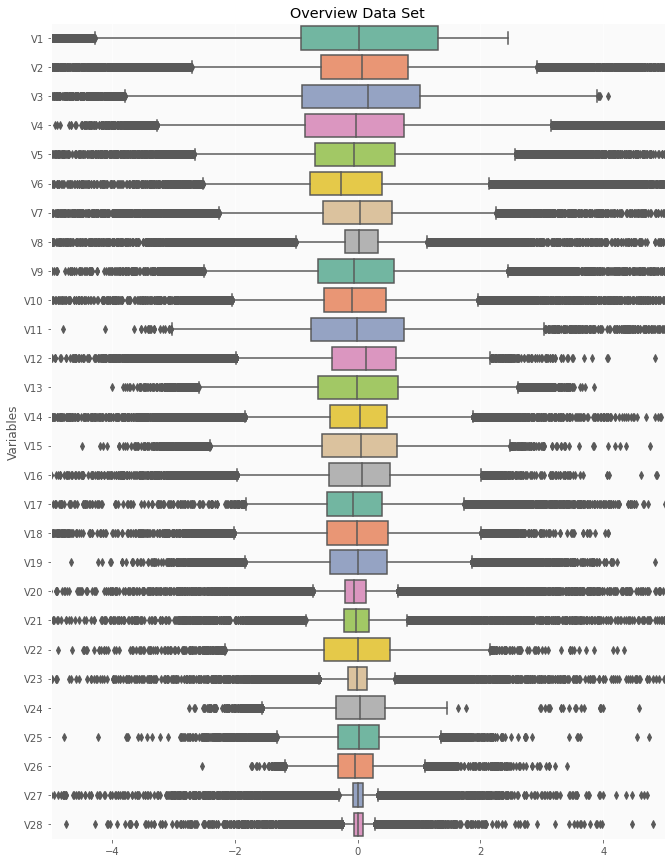

In [6]:
# Using ggplot2 style 
plt.style.use('ggplot') 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-5, 5))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df.drop(columns=['Class', 'Time', 'Amount']), orient = 'h', palette = 'Set2')

In [7]:
print("Target variable (Class) number instances:")
print(df.Class.value_counts())
print("Target variable (Class) number instances (normalized):")
print(df.Class.value_counts(normalize=True))

Target variable (Class) number instances:
0    49508
1      492
Name: Class, dtype: int64
Target variable (Class) number instances (normalized):
0    0.99016
1    0.00984
Name: Class, dtype: float64


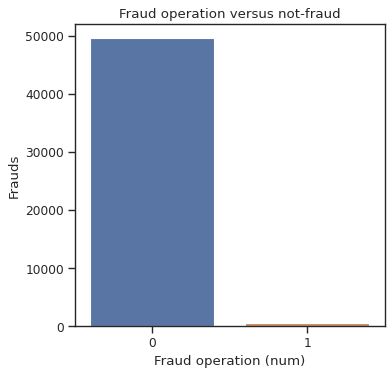

In [8]:

plt.figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')

sns.set(style="ticks")
f = sns.countplot(x="Class", data=df)
plt.title ("Fraud operation versus not-fraud")
plt.xlabel ("Fraud operation (num)")
plt.ylabel ("Frauds")
plt.show()


<Figure size 1600x1600 with 0 Axes>

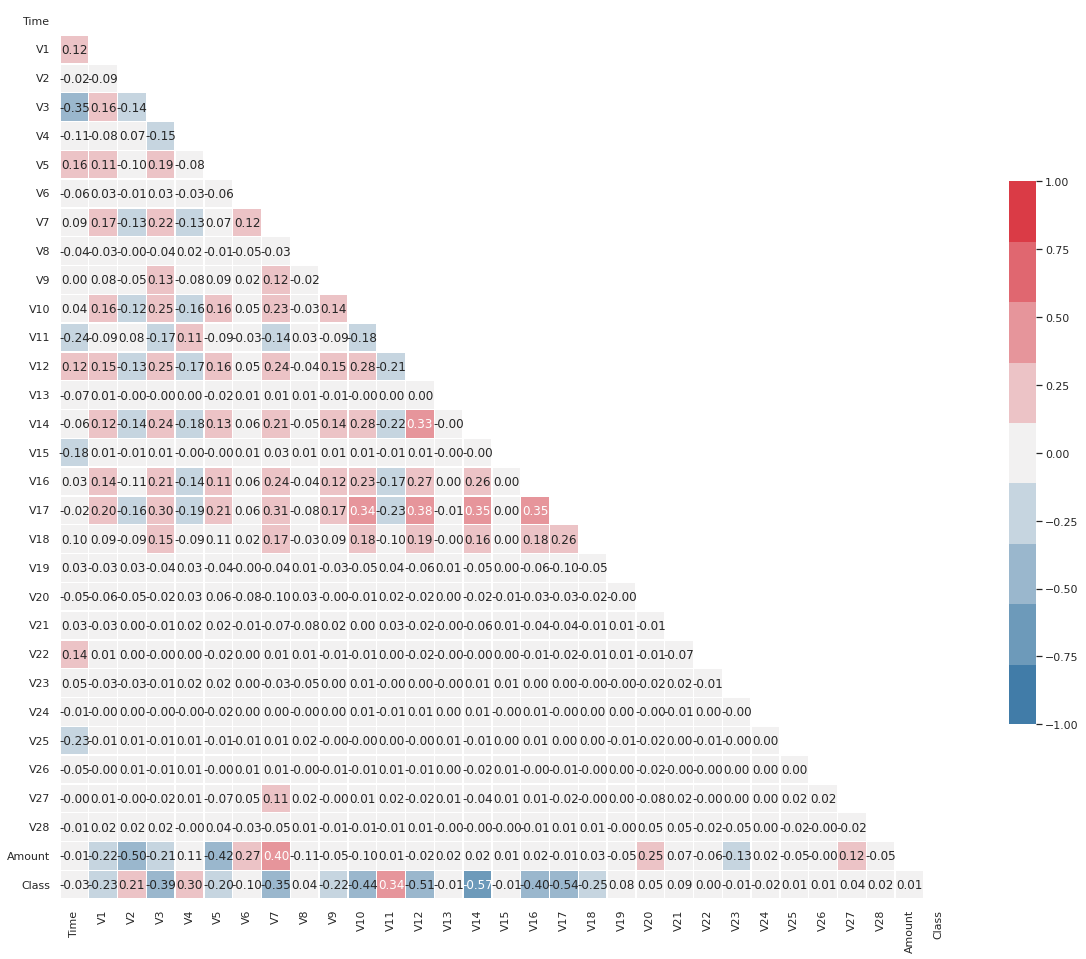

In [9]:
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
#a heatmap is showing clearing correlation (red) and anticorrelation (blue)
corr = df.corr() #calulating the correlation
mask = np.zeros_like(corr) #to mask the other corner, which is redundant
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask, linewidths=.5, 
                     cmap=sns.diverging_palette(240, 10, n=9), #diverging palette to show corr and anticorr in different colors
                     cbar_kws={"shrink": 0.5},
                     vmin = -1, vmax = 1, annot=True, fmt=".2f", square=True)

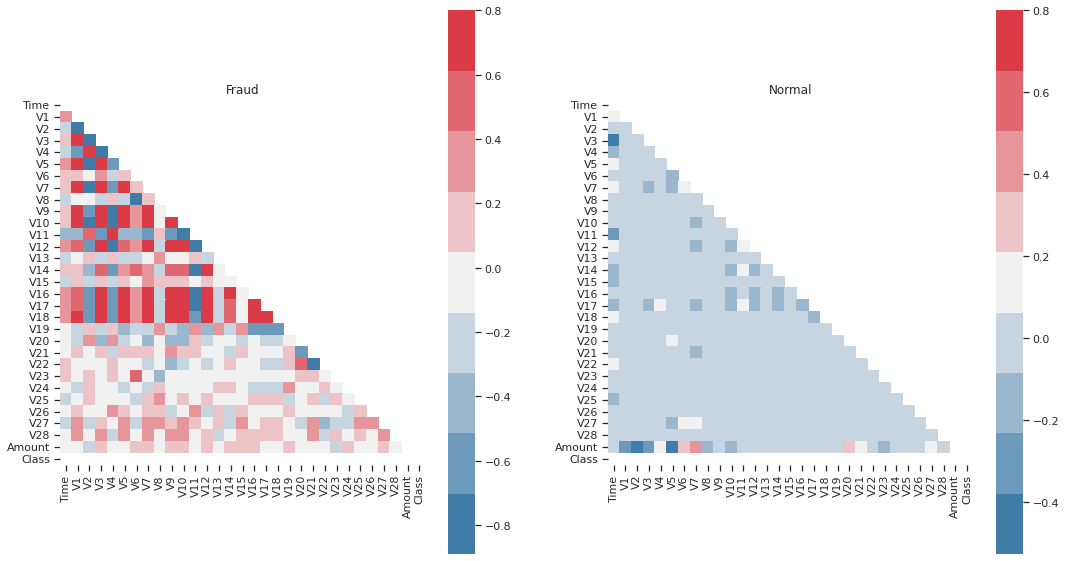

In [10]:
# we can do a correlation heatmap for each class
f, (ax1, ax2) = plt.subplots(1,2,figsize =( 18, 10))
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap((df.loc[df['Class'] ==1]).corr(), vmax = .8, square=True, ax = ax1, 
            cmap = sns.diverging_palette(240, 10, n=9), mask=mask);
ax1.set_title('Fraud')
sns.heatmap((df.loc[df['Class'] ==0]).corr(), vmax = .8, square=True, ax = ax2, 
            cmap = sns.diverging_palette(240, 10, n=9), mask=mask);
ax2.set_title('Normal')
plt.show()

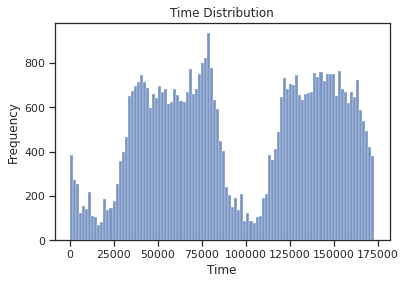

In [11]:
g = sns.histplot(df.Time, bins=100, label="Time", )
g.set_xlabel("Time")
g.set_ylabel("Frequency")
g.set_title("Time Distribution")
plt.show()

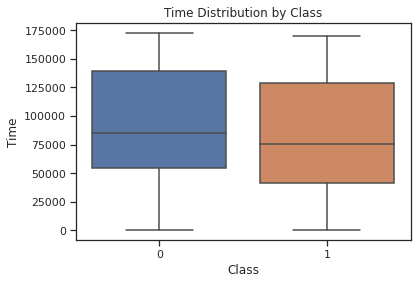

In [12]:
g = sns.boxplot(x="Class", y="Time", data=df)
g.set_title("Time Distribution by Class")
plt.show()

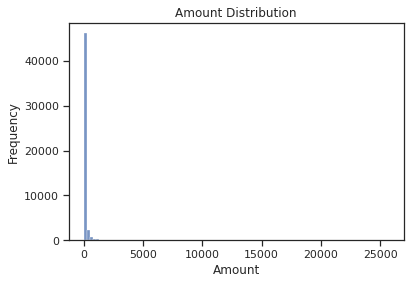

In [13]:
g = sns.histplot(df.Amount, bins=100, label="Amount")
g.set_ylabel("Frequency")
g.set_title("Amount Distribution")
plt.show()

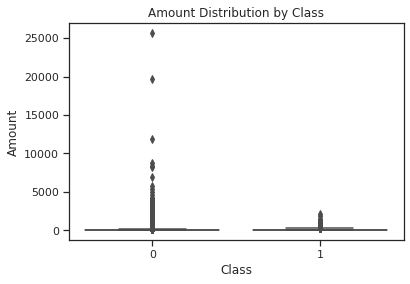

In [14]:
g = sns.boxplot(x="Class", y="Amount", data=df)
g.set_title("Amount Distribution by Class")
plt.show()